<table class="m01-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/yy/dviz-course/blob/master/docs/m10-logscale/lab10.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a href="https://yyahn.com/dviz-course/m10-logscale/lab10/"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on Github</a>
  </td>
  <td>
    <a href="https://raw.githubusercontent.com/yy/dviz-course/master/docs/m10-logscale/lab10.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View raw on Github</a>
  </td>
</table>

# Module 10: Logscale

In this module, we will learn why we want to use log scale for some types of data and strategies for using log scale. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss
import vega_datasets

## Ratio and logarithm

If you use linear scale to visualize ratios, it can be quite misleading. As learned in the class, ratio values larger than 1 can vary between 1 and infinite, while ratio values smaller than 1 can vary only between 0 and 1. For instance, the ratios of 100:1 (100/1) or 1000:1 (1000/1) are represented as 100 and 1000. The corresponding distances from 1:1 (1) are 99 and 999, respectively. On the other hand, the ratios of 1:100 (1/100) or 1:1000 (1/1000) are represented as 0.01 and 0.001. The corresponding distances from 1:1 (1) are 0.99 and 0.999, respectively. In other words, there is no symmetry between symmetric ratios! 

You can watch my video [Why you should use logarithmic scale when visualizing ratios](https://www.youtube.com/watch?v=Q9azoaH7gds). 

To see this clearly, let's first create some ratios.

In [2]:
x = np.array([1,    1,   1,  1, 10, 100, 1000])
y = np.array([1000, 100, 10, 1, 1,  1,   1   ])
ratio = x/y
print(ratio)

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


**Q: Plot on the linear scale using the [`scatter()`](http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html) function. Also draw a horizontal line at ratio=1 for a reference. The x-axis will be simply the data ID that refers to each ratio data point. Y-axis will be the ratio values.**

Text(0, 0.5, 'Ratio')

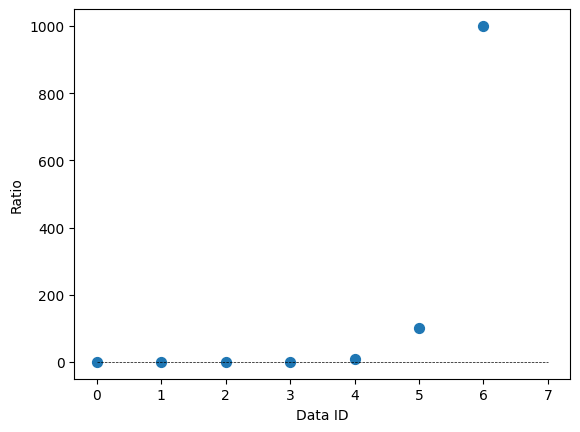

In [3]:
X = np.arange(len(ratio))

# YOUR SOLUTION HERE

**Q: Is this a good visualization of the ratio data? Why? Why not? Explain.**

# YOUR SOLUTION HERE

**Q: Can you fix it?**

In [4]:
# YOUR SOLUTION HERE

## Log-binning

One way to draw a histogram in log-scale, with a broadly distributed data, is by using log-binning. 

Let's first see what happens if we do not use the log scale for a dataset with a heavy tail.

**Q: Load the movie dataset from `vega_datasets` and remove the NaN rows based on the following columns: `IMDB Rating`, `IMDB Votes`, `Worldwide_Gross`, `Rotten Tomatoes Rating`.**

In [5]:
# YOUR SOLUTION HERE

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
4,Slam,1009819.0,1087521.0,NaN,1000000.0,Oct 09 1998,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,None,62.0,3.4,165.0
8,Pirates,1641825.0,6341825.0,NaN,40000000.0,Jul 01 1986,R,NaN,None,None,None,None,Roman Polanski,25.0,5.8,3275.0
9,Duel in the Sun,20400000.0,20400000.0,NaN,6000000.0,Dec 31 2046,None,NaN,None,None,None,None,None,86.0,7.0,2906.0
10,Tom Jones,37600000.0,37600000.0,NaN,1000000.0,Oct 07 1963,None,NaN,None,None,None,None,None,81.0,7.0,4035.0
11,Oliver!,37402877.0,37402877.0,NaN,10000000.0,Dec 11 1968,None,NaN,Sony Pictures,None,Musical,None,None,84.0,7.5,9111.0


If you simply call `hist()` method with a dataframe object, it identifies all the numeric columns and draw a histogram for each.

**Q: draw all possible histograms of the movie dataframe. Adjust the size of the plots if needed.**

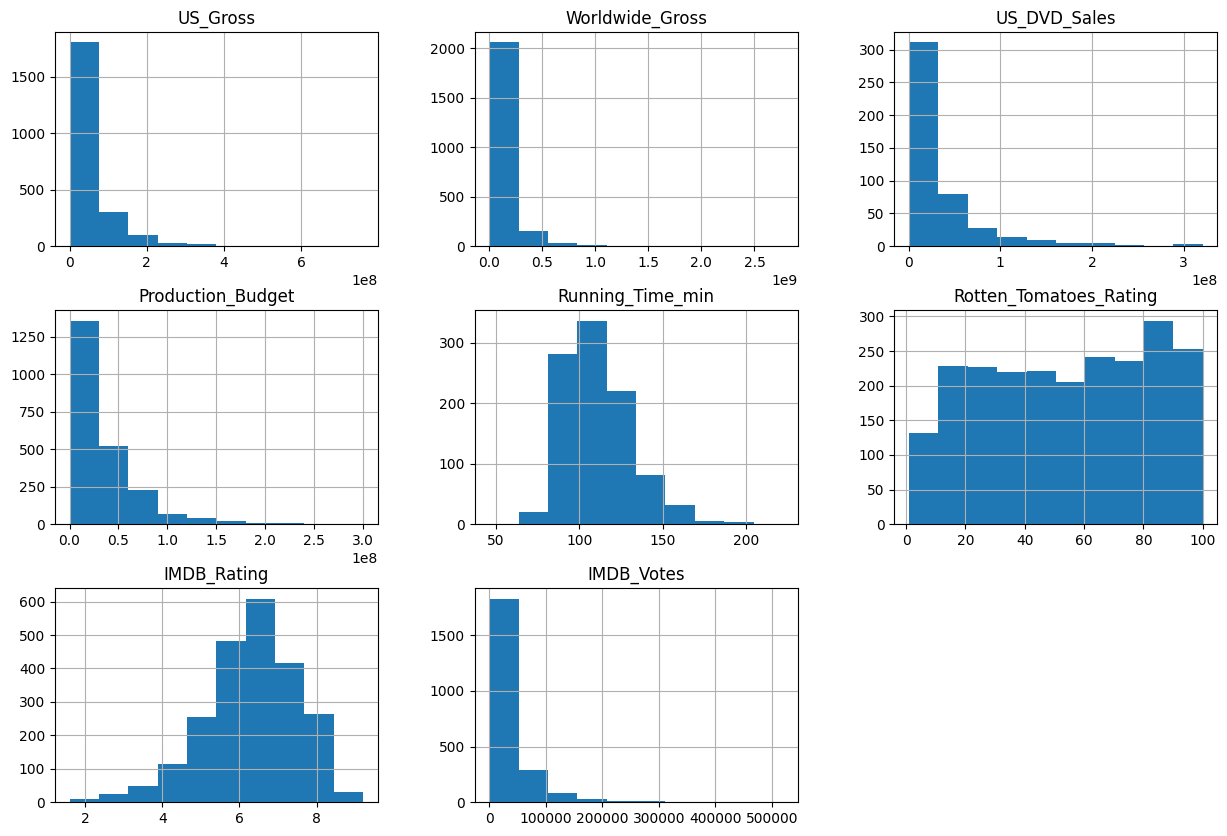

In [6]:
# YOUR SOLUTION HERE

As we can see, a majority of the columns are not normally distributed. In particular, if you look at the worldwide gross variable, you only see a couple of meaningful data from the histogram. Is this a problem of resolution? How about increasing the number of bins?

Text(0, 0.5, 'Frequency')

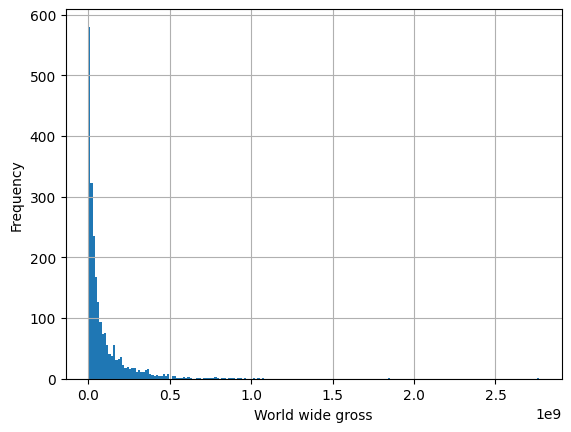

In [7]:
ax = movies["Worldwide_Gross"].hist(bins=200)
ax.set_xlabel("World wide gross")
ax.set_ylabel("Frequency")

Maybe a bit more useful, but it doesn't tell anything about the data distribution above certain point. How about changing the vertical scale to logarithmic scale?

Text(0, 0.5, 'Frequency')

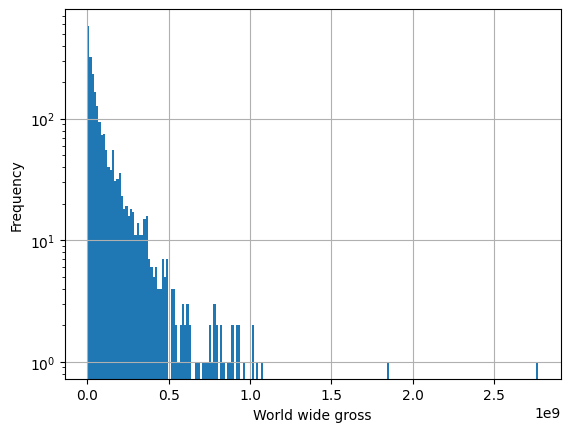

In [8]:
# YOUR SOLUTION HERE

Now, let's try log-bin. Recall that when plotting histgrams we can specify the edges of bins through the `bins` parameter. For example, we can specify the edges of bins to [1, 2, 3, ... , 10] as follows.


<Axes: >

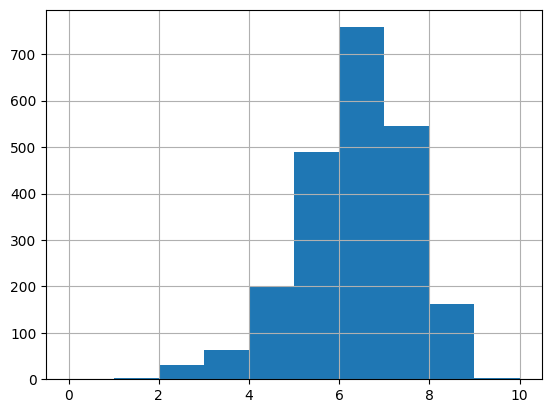

In [9]:
movies["IMDB_Rating"].hist(bins=range(0,11))

Here, we can specify the edges of bins in a similar way. Instead of specifying on the linear scale, we do it on the log space. Some useful resources:

* [Google query: python log-bin](https://www.google.com/search?q=python+log+binning)
* [numpy.logspace](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html)
* [numpy.linspace vs numpy.logspace](https://stackoverflow.com/questions/31480033/difference-in-output-between-numpy-linspace-and-numpy-logspace)

Hint: since $10^{\text{start}}= \text{min(Worldwide\_Gross)}$, $\text{start} = \log_{10}(\text{min(Worldwide\_Gross)})$

In [10]:
min(movies["Worldwide_Gross"])

0.0

Because there seems to be movie(s) that made $0, and because log(0) is undefined & log(1) = 0, let's add 1 to the variable.  

In [11]:
movies["Worldwide_Gross"] = movies["Worldwide_Gross"]+1.0

In [12]:
# TODO: specify the edges of bins using np.logspace

# YOUR SOLUTION HERE

array([1.00000000e+00, 3.14018485e+00, 9.86076088e+00, 3.09646119e+01,
       9.72346052e+01, 3.05334634e+02, 9.58807191e+02, 3.01083182e+03,
       9.45456845e+03, 2.96890926e+04, 9.32292387e+04, 2.92757043e+05,
       9.19311230e+05, 2.88680720e+06, 9.06510822e+06, 2.84661155e+07,
       8.93888645e+07, 2.80697558e+08, 8.81442219e+08, 2.76789150e+09])

Now we can plot a histgram with log-bin. Set both axis to be log-scale.

Text(0, 0.5, 'Frequency')

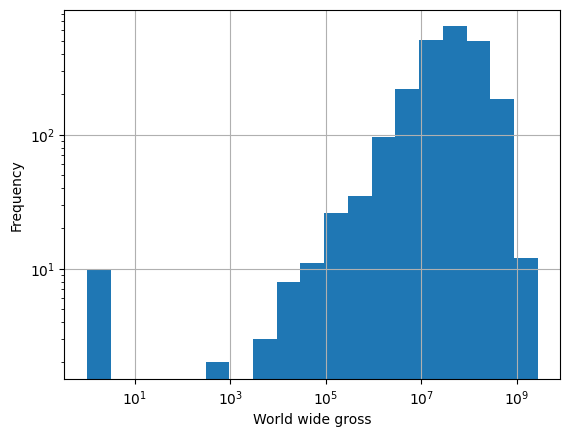

In [13]:
ax = (movies["Worldwide_Gross"]+1.0).hist(bins=bins)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("World wide gross")
ax.set_ylabel("Frequency")

What is going on? Is this the right plot?

**Q: explain and fix**

Text(0, 0.5, 'Probability density')

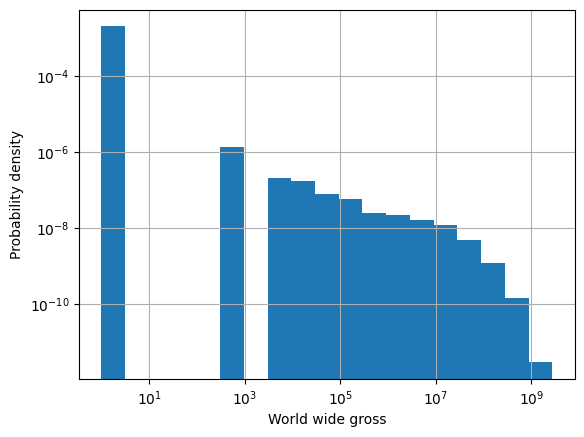

In [14]:
# YOUR SOLUTION HERE

**Q: Can you explain the plot? Why are there gaps?**

In [15]:
# YOUR SOLUTION HERE

## CCDF

The cumulative distribution function $F_X(x)$ at $x$ is defined by 

$$F_X(x) = P(X \le x),$$ 

which is, in other words, the probability that $X$ takes a value less than or equal to $x$. When empirically calculated (empirical CDF), $F_X(x)$ is the fraction of data points that are less than or equal to $x$. CDF allows us to examine any percentile of the data distribution and is also useful for comparing distributions. 

However, when the data spans multiple orders of magnitude, CDF may not be useful. Let's try. 

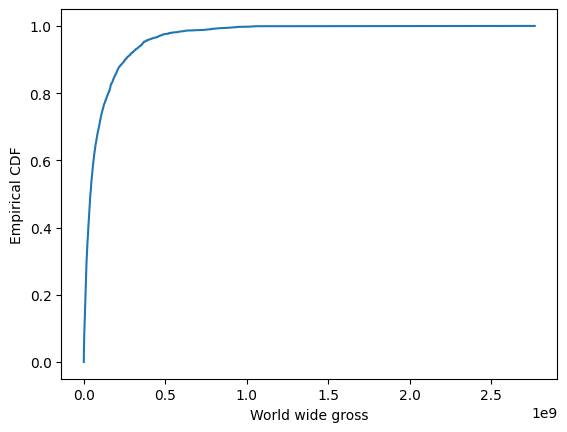

In [16]:
gross_sorted = movies.Worldwide_Gross.sort_values()
N = len(gross_sorted)
Y = np.linspace(1/N, 1, num=N)
plt.xlabel("World wide gross")
plt.ylabel("Empirical CDF")
_ = plt.plot(gross_sorted, Y)

Although the movies that are interesting are those with large worldwide gross, we don't see any details about their distribution as they are all close to 1. In other words, CDF sucks at revealing the details of the tail.

CCDF is a nice alternative to examine distributions with heavy tails. The idea is same as CDF, but the direction of aggregation is opposite. Because we are starting from the largest value, it can reveal the details of those large values (tail). 

CCDF is defined as follows:

$$ \bar{F}_X(x) = P(X > x)$$

And thus, 

$$ \bar{F}_X(x) = P(X > x) = 1 - F_X(x)$$

In other words, we can use CDF to calculate CCDF.

**Q: draw CCDF using the CDF code above.**

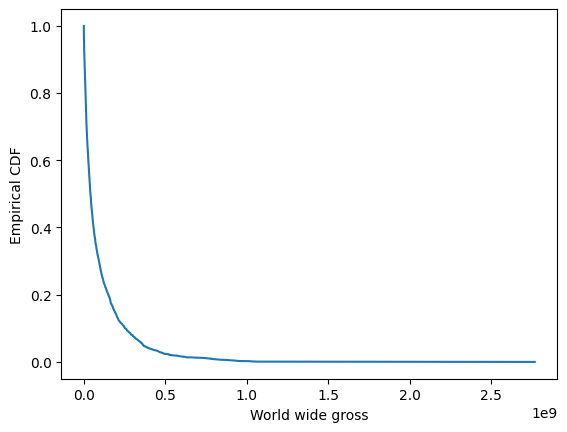

In [17]:
# YOUR SOLUTION HERE

How about making the y axis in log scale?

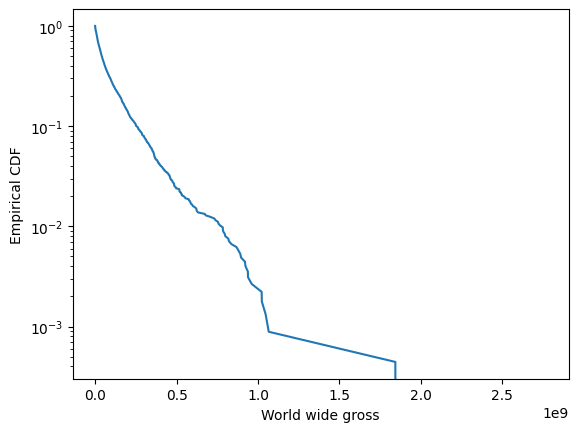

In [18]:
# YOUR SOLUTION HERE

Although this is technically the correct CCDF plot, there is a very subtle issue. Do you see the vertical line at the rightmost side of the CCDF plot? To understand what's going on, let's look at the Y values of this plot. We used 1 - CDF to calculate CCDF. So,

In [19]:
1 - Y

array([9.99556738e-01, 9.99113475e-01, 9.98670213e-01, ...,
       8.86524823e-04, 4.43262411e-04, 0.00000000e+00])

What happens when we take the log of these values?

In [20]:
np.log(1-Y)

/var/folders/d0/wgh1l_5905x4crqpp1b7whz40000gn/T/ipykernel_21837/1767632406.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(1-Y)


array([-4.43360681e-04, -8.86918018e-04, -1.33067219e-03, ...,
       -7.02820143e+00, -7.72134861e+00,            -inf])

Because the last value of 1 - Y is 0.0, we got `-inf` as the log value. That means, the largest value's (let's say $x$) coordinate in our CCDF plot will be $(x, -inf)$ if we use a log scale for our y-axis. And thus we will not be able to see it in the plot. This occurs because we are drawing CDF in a simplified way. In reality, ECDF and ECCDF are step functions and this shouldn't matter. However, because we are drawing a line between the points, we are getting this issue.

This is somewhat problematic because the largest value in our dataset can be quite important and therefore we want to see it in the plot! 

This is why, in practice, we sometimes use "incorrect" version of CCDF. We can consider $\bar{F}_X(x)$ as a "flipped" version of CDF. 

$$ \bar{F}_X(x) = P(X \ge x) $$

instead of 

$$ \bar{F}_X(x) = P(X > x) $$

In doing so, we can see the largest value in the data in our CCDF plot. We can also draw the correct version of CCDF, but this quick-and-dirty version is often easier and good enough to show what we want to show. 

A simple way is just to define the y coordinates as follows:


In [21]:
Y = np.linspace( 1.0, 1/N, num=N)


**Q: Draw a CCDF of worldwide gross data. Use log scale for y-axis.**

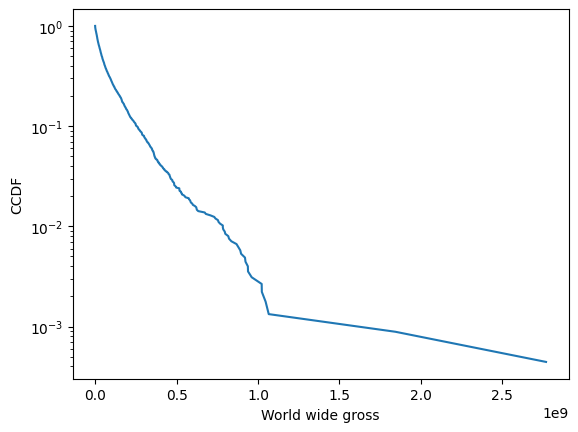

In [22]:
# YOUR SOLUTION HERE

A straight line in semilog scale means exponential decay (cf. a straight line in log-log scale means power-law decay). So it seems like the amount of money a movie makes across the world follows *roughly* an exponential distribution, while there are some outliers that make insane amount of money.

**Q: Which is the most successful movie in our dataset?**

You can use the following

- `idxmax()`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmax.html
- `loc`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html

In [23]:
# YOUR SOLUTION HERE

Title                                  Avatar
US_Gross                          760167650.0
Worldwide_Gross                  2767891500.0
US_DVD_Sales                      146153933.0
Production_Budget                 237000000.0
Release_Date                      Dec 18 2009
MPAA_Rating                             PG-13
Running_Time_min                          NaN
Distributor                  20th Century Fox
Source                    Original Screenplay
Major_Genre                            Action
Creative_Type                 Science Fiction
Director                        James Cameron
Rotten_Tomatoes_Rating                   83.0
IMDB_Rating                               8.3
IMDB_Votes                           261439.0
Name: 1234, dtype: object